# 04. 분류모델

유방암 여부를 분류하는 문제를 다양한 분류모델을 활용하여 해결해봅니다.

* **분석데이터**:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
  
  
  
  
  
* **환경설정**:  
 1) xgboost설치
  - Anaconda Prompt실행
  - 설치명령어:conda install -c anaconda py-xgboost
  
 2) lightgbm설치
  - Visual Studio Build tool 2015 이상 설치
  - 설치명령어:conda install -c conda-forge lightgbm

 3) 설치 여부 확인    
  import xgboost  
  print(xgboost.__version__)

## Step0. 준비

### 라이브러리 로딩

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

### 데이터 로딩

In [3]:
breast_cancer = load_breast_cancer()

In [4]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
breast_cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
breast_cancer['data'].shape

(569, 30)

In [8]:
breast_cancer.target.shape

(569,)

In [9]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
breast_cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['label'] = breast_cancer.target
breast_cancer_df.head(100)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1


## Step1. 데이터 전처리

### [Q1] 분석할 데이터는 몇 개의 feature, 몇 개의 데이터로 구성되어 있습니까?

In [12]:
# 데이터프레임의 요약 정보
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### [Q2] 분석할 데이터의 통계정보를 살펴보세요

In [13]:
# 데이터프레임의 통계 정보 
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### [Q3] 분석할 타겟('label')은 몇 가지 종류로 구성되어 있습니까?

In [14]:
# 품종(label) 카테고리 확인
breast_cancer_df['label'].unique()

array([0, 1])

### [Q4] 분석할 데이터에 결측치가 있는지 확인하고, 결측치가 있는 데이터는 삭제하세요

In [15]:
# 결측치 확인
breast_cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

### [Q5] 분석할 데이터를 train_test_split()함수를 사용하여 학습용과 테스트용으로 나누세요

In [16]:
X = breast_cancer_df.iloc[:, :30]
y = breast_cancer_df['label']

from sklearn.model_selection import train_test_split
# 학습용 데이터와 테스트용 데이터로 나눔

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
len(X_train)

426

In [18]:
len(X_test)

143

## Step2. 학습/예측/평가

### [Q6] 분석할 데이터를 DecisionTreeClassifier를 사용하여 학습하고, 테스트 셋을 사용하여 정확도를 확인하세요

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

'''
코드를 작성하세요
'''
# (참고)
# DecisionTree Classifier 생성
dt_model = DecisionTreeClassifier(random_state=10)
# DecisionTreeClassifer 학습. 
dt_model.fit(X_train , y_train)
# DecisionTreeClassifer 예측
pred = dt_model.predict(X_test)
# DecisionTreeClassifer 평가
accuracy = accuracy_score(y_test , pred)
print('DecisionTreeClassifer 정확도: {0:.4f}'.format(accuracy))


DecisionTreeClassifer 정확도: 0.9301


### [Q7] 분석할 데이터를 다양한 분류기를 사용하여 학습하고, 테스트 셋을 사용하여 정확도를 확인하세요 
* KNeighborsClassifier
* SVM
* RandomForestClassifier
* LogisticRegression
* GradientBoostingClassifier
* XGBClassifier
* LGBMClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# KNeighborsClassifier 생성
kn_model = KNeighborsClassifier()
# DecisionTreeClassifer 학습. 
kn_model.fit(X_train , y_train)
# DecisionTreeClassifer 예측
pred = kn_model.predict(X_test)
# DecisionTreeClassifer 평가
accuracy = accuracy_score(y_test , pred)
print('KNeighborsClassifier 정확도: {0:.4f}'.format(accuracy))


# SVC 생성
svc_model = SVC()
# SVC 학습. 
svc_model.fit(X_train , y_train)
# SVC 예측
pred = svc_model.predict(X_test)
# SVC 평가
accuracy = accuracy_score(y_test , pred)
print('svc_model 정확도: {0:.4f}'.format(accuracy))


# RandomForestClassifier 생성
rd_model = RandomForestClassifier()
# RandomForestClassifier 학습. 
rd_model.fit(X_train , y_train)
# RandomForestClassifier 예측
pred = rd_model.predict(X_test)
# RandomForestClassifier 평가
accuracy = accuracy_score(y_test , pred)
print('rd_model 정확도: {0:.4f}'.format(accuracy))

# LogisticRegression 생성
log_model = LogisticRegression()
# LogisticRegression 학습. 
log_model.fit(X_train , y_train)
# LogisticRegression 예측
pred = log_model.predict(X_test)
# LogisticRegression 평가
accuracy = accuracy_score(y_test , pred)
print('log_model 정확도: {0:.4f}'.format(accuracy))

# GradientBoostingClassifier 생성
gr_model = GradientBoostingClassifier()
# GradientBoostingClassifier 학습. 
gr_model.fit(X_train , y_train)
# GradientBoostingClassifier 예측
pred = gr_model.predict(X_test)
# GradientBoostingClassifier 평가
accuracy = accuracy_score(y_test , pred)
print('gr_model 정확도: {0:.4f}'.format(accuracy))

# XGBClassifier 생성
XG_model = XGBClassifier()
# XGBClassifier 학습. 
XG_model.fit(X_train , y_train)
# XGBClassifier 예측
pred = XG_model.predict(X_test)
# XGBClassifier 평가
accuracy = accuracy_score(y_test , pred)
print('XG_model 정확도: {0:.4f}'.format(accuracy))

# LGBMClassifier 생성
LG_model = LGBMClassifier()
# LGBMClassifier 학습. 
LG_model.fit(X_train , y_train)
# LGBMClassifier 예측
pred = LG_model.predict(X_test)
# LGBMClassifier 평가
accuracy = accuracy_score(y_test , pred)
print('LG_model 정확도: {0:.4f}'.format(accuracy))

KNeighborsClassifier 정확도: 0.8951
svc_model 정확도: 0.8881
rd_model 정확도: 0.9580
log_model 정확도: 0.9371
gr_model 정확도: 0.9510
[16:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG_model 정확도: 0.9580
LG_model 정확도: 0.9790


### xgboost의 feature 중요도를 시각화 하세요
아래 코드를 실행시켜 보세요

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

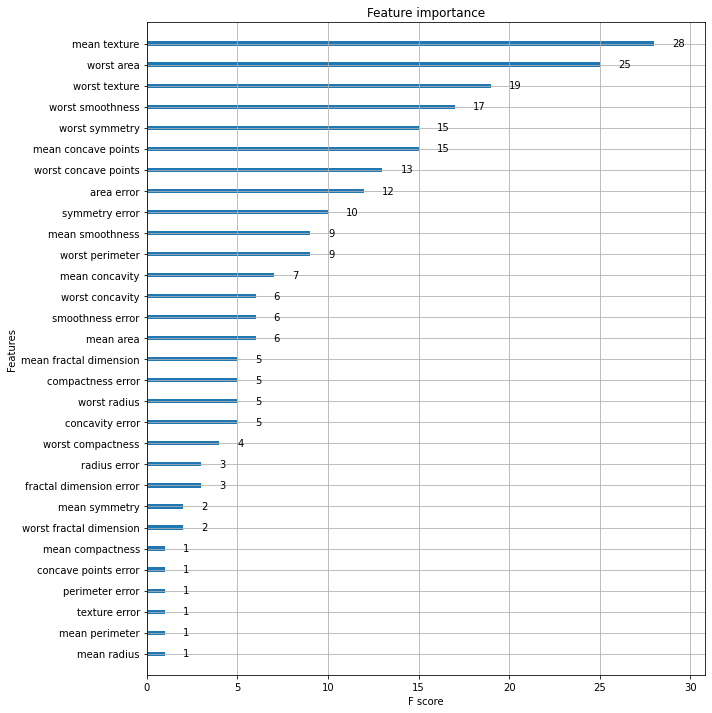

In [32]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(XG_model, ax=ax)

### lightgbm의 feature 중요도를 시각화 하세요
아래 코드를 실행시켜 보세요

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

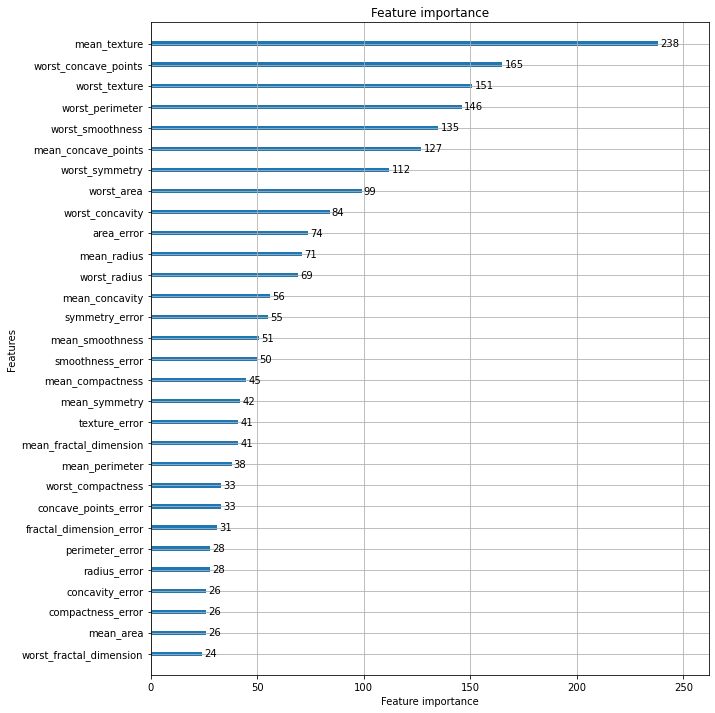

In [33]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LG_model, ax=ax)

### 각 모델의  혼동행렬, 정확도, 정밀도, 재현율, F1 score, AUC를 구하세요
 아래 함수를 사용하세요

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('혼동행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [31]:
model_list = [neighbor_model, svm_model, forest_model, logistic_model, gbm_model, xgb_model, lgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    model_name = model.__class__.__name__
    print('\n{0} 정확도:'.format(model_name)) 
    get_clf_eval(y_test, pred)


KNeighborsClassifier 정확도:
혼동행렬
[[45  5]
 [ 0 93]]
정확도: 0.9650, 정밀도: 0.9490, 재현율: 1.0000, F1: 0.9738

SVC 정확도:
혼동행렬
[[35 15]
 [ 0 93]]
정확도: 0.8951, 정밀도: 0.8611, 재현율: 1.0000, F1: 0.9254

RandomForestClassifier 정확도:
혼동행렬
[[46  4]
 [ 1 92]]
정확도: 0.9650, 정밀도: 0.9583, 재현율: 0.9892, F1: 0.9735

LogisticRegression 정확도:
혼동행렬
[[43  7]
 [ 2 91]]
정확도: 0.9371, 정밀도: 0.9286, 재현율: 0.9785, F1: 0.9529

GradientBoostingClassifier 정확도:
혼동행렬
[[47  3]
 [ 4 89]]
정확도: 0.9510, 정밀도: 0.9674, 재현율: 0.9570, F1: 0.9622

XGBClassifier 정확도:
혼동행렬
[[47  3]
 [ 2 91]]
정확도: 0.9650, 정밀도: 0.9681, 재현율: 0.9785, F1: 0.9733

LGBMClassifier 정확도:
혼동행렬
[[46  4]
 [ 1 92]]
정확도: 0.9650, 정밀도: 0.9583, 재현율: 0.9892, F1: 0.9735


## Step3. 성능 개선

### [Q8] 학습 조기 종료 방법을 사용하여 XGBClassifier의 성능을 개선하세요
 * (힌트) fit함수의 early_stopping_rounds 파라미터를 셋팅
 * fit함수의 verbose=True로 설정하여 학습 상태를 확인해봅니다 

In [1]:
from xgboost import XGBClassifier

'''
코드를 작성하세요

(참고)
'''

xgb_model2 = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]      #early_stopping_rounds=100은 100번의 시행동안 증가하지 않을시 멈춘다는 의미     
xgb_model2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True) 
xgb_pred = xgb_model2.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('XGBoost EarlyStopping 정확도: {0:.4f}'.format(xgb_accuracy))


NameError: name 'X_test' is not defined

### [Q9] 학습 조기 종료 방법을 사용하여 LGBMClassifier 성능을 개선하세요
 * (힌트) fit함수의 early_stopping_rounds 파라미터를 셋팅
 * fit함수의 verbose=True로 설정하여 학습 상태를 확인해봅니다 

In [20]:
from lightgbm import LGBMClassifier

'''
코드를 작성하세요
'''  

[1]	valid_0's binary_logloss: 0.585504
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.525569
[3]	valid_0's binary_logloss: 0.478071
[4]	valid_0's binary_logloss: 0.439154
[5]	valid_0's binary_logloss: 0.404756
[6]	valid_0's binary_logloss: 0.37598
[7]	valid_0's binary_logloss: 0.351062
[8]	valid_0's binary_logloss: 0.328015
[9]	valid_0's binary_logloss: 0.306206
[10]	valid_0's binary_logloss: 0.289151
[11]	valid_0's binary_logloss: 0.274427
[12]	valid_0's binary_logloss: 0.259433
[13]	valid_0's binary_logloss: 0.248476
[14]	valid_0's binary_logloss: 0.238291
[15]	valid_0's binary_logloss: 0.227809
[16]	valid_0's binary_logloss: 0.217847
[17]	valid_0's binary_logloss: 0.210405
[18]	valid_0's binary_logloss: 0.201296
[19]	valid_0's binary_logloss: 0.195133
[20]	valid_0's binary_logloss: 0.18921
[21]	valid_0's binary_logloss: 0.18138
[22]	valid_0's binary_logloss: 0.175718
[23]	valid_0's binary_logloss: 0.17052
[24]	valid_0's binary_logloss: 

### [Q10] VotingClassifier를 사용해서 앙상블 모델을 생성/학습/평가하세요.
 * 개별 모델 : LogisticRegression, KNeighborsClassifier 조합
 * voting='soft'

In [21]:
from sklearn.ensemble import VotingClassifier

'''
코드를 작성하세요
''' 

voting_model = VotingClassifier( estimators=[('LR',logistic_model),
                                             ('KNN',neighbor_model)] , voting='soft' )

voting_model.fit(X_train , y_train)
pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('VotingClassifier 정확도: {0:.4f}'.format(accuracy))
 

VotingClassifier 정확도: 0.9650


### [Q11] GridSearchCV를 사용해서 RandomForestClassifier의 하이퍼파라미터를 튜닝하세요
 *     'n_estimators':[100],
 *   'max_depth' : [6, 8, 10, 12], 
 *   'min_samples_leaf' : [8, 12, 18 ],
 *   'min_samples_split' : [8, 16, 20]

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
'''
코드를 작성하세요
'''

rf_model = RandomForestClassifier()

import pandas as pd

# param_grid: 하이퍼파라미터
# cv: 3개의 train, test set fold 로 나누어 학습   

rf_model = GridSearchCV(rf_model, param_grid=params, cv=3)

# param_grid의 하이퍼파라미터들을 순차적으로 학습
rf_model.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(rf_model.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.163710,0.003690,0.012996,8.881070e-06,6,8,8,100,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.936620,0.922535,0.992958,0.950704,0.030426,2
1,0.165704,0.002055,0.012669,4.713142e-04,6,8,16,100,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.929577,0.922535,0.992958,0.948357,0.031668,4
2,0.171037,0.004897,0.013006,1.168224e-05,6,8,20,100,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.929577,0.922535,0.985915,0.946009,0.028364,7
3,0.168705,0.009033,0.012997,8.935662e-06,6,12,8,100,"{'max_depth': 6, 'min_samples_leaf': 12, 'min_...",0.929577,0.922535,0.971831,0.941315,0.021769,25
4,0.158702,0.001247,0.012670,4.714266e-04,6,12,16,100,"{'max_depth': 6, 'min_samples_leaf': 12, 'min_...",0.922535,0.922535,0.985915,0.943662,0.029878,15
5,0.159036,0.001633,0.013003,1.946680e-07,6,12,20,100,"{'max_depth': 6, 'min_samples_leaf': 12, 'min_...",0.929577,0.929577,0.985915,0.948357,0.026558,4
6,0.156368,0.001700,0.012003,0.000000e+00,6,18,8,100,"{'max_depth': 6, 'min_samples_leaf': 18, 'min_...",0.915493,0.915493,0.985915,0.938967,0.033198,32
7,0.157038,0.000817,0.012003,2.247832e-07,6,18,16,100,"{'max_depth': 6, 'min_samples_leaf': 18, 'min_...",0.915493,0.922535,0.985915,0.941315,0.031668,25
8,0.156695,0.001246,0.012009,9.160432e-06,6,18,20,100,"{'max_depth': 6, 'min_samples_leaf': 18, 'min_...",0.922535,0.929577,0.978873,0.943662,0.025064,15
9,0.161370,0.001700,0.012336,4.714266e-04,8,8,8,100,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.929577,0.922535,0.985915,0.946009,0.028364,7


In [29]:


rf_model.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8)

### [Q12] GridSearchCV를 사용해서 GBM의 하이퍼파라미터를 튜닝하세요
    * 'n_estimators':[100, 500],
    * 'learning_rate' : [ 0.05, 0.1]

In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}

gbm_model = GradientBoostingClassifier(random_state=10)
'''
코드를 작성하세요
'''

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9531
